In [1]:
#import Pkg; Pkg.add("FileIO")
using Distributions
using Plots
using FileIO
using JLD2
using LaTeXStrings
using Base.Threads
using LinearAlgebra
#Pkg.instantiate()

In [2]:
include("../aux_functions/inidat_aux_functions.jl")

f_x

We test now that the distributions have $L^1$ norm unity.

In [ ]:
L = 40
α = 0.001
θ = 0.001
m = 2.0
N = 1_000_000
interval_x = (0.0,L)
p_max = sqrt((1+10*θ)^2-1) 
interval_p = (0, p_max) # we then antisymmetrize to get the negative values.
par_f_x = (α, m, L)
par_f_p_1 = (θ,1.0)
par_init = (N,)

n = 2000
dp = p_max/(n-1) 
p = [dp*(i-1) for i in 1:n]

## the result should be 1/2 because we are just integrating for positive p


#(sum(f_p.(p,par_f_p)) - 0.5*(f_p(0,par_f_p) + f_p(p_max,par_f_p)))*dp # OK

norm = norm_f_p_rel(f_p_rel,par_f_p_1,n,p_max)
par_f_p = (θ,norm)

F(p) = f_p_rel(p,par_f_p)
(sum(F.(p)) - 0.5*(F(0) + F(p_max)))*dp #OK

We see that for the non-relativistic distribution function the normalization is correct, but for the relativistic one it is not. So we can normalize it numerically. 

## Test 2D space-Landau distribution function 

In [ ]:
Box = (0.0,3.0,-1.0,1.0)
m = [1,3]
α = [0.1,0.2]
par = (α, m, Box)
f_x([3,4],par)


## Checking the momentum distribution

In [ ]:
f_p_rel([1.0,2.0],(0.5,1))

### Normalization, we make first a mid_point integrator

In [ ]:
x = 0:0.01:1
y = 0:0.01:2

f(v) = (v'*v)

#F = [f([v for v in (xx,yy)]) for xx in x, yy in y] 

sum(F)/length(x)/length(y)*2

In [ ]:
2/3 + 1/3*8  

In [ ]:
ff(v,par) = v'*v
fc(v,par) = 1

int_mid_point_f(fc, (5,) , [101,201], (0,1,0,2))

In [ ]:
#### 3D ####
int_mid_point_f(fc, (5,) , [101,201,301], (0,1,0,2,-1,1))

In [ ]:
Float64(int_mid_point_f(ff, (5,) , [101,201,301], (0,1,0,2,-1,1)))

In [ ]:
#1/3+y^2 + z^2
#2/3 + 1/3*2^3 + 2z^2
4/3 + 2^4/3 + 2/3*2

Works OK

Below is the calculation for the volume in 3D which is used in the midpoint rule

In [ ]:
n1,n2,n3 = (3,4,5)
((n1*n2*n3) - 1//2*(2*n1*n2 + 2*n2*n3 + 2*n3*n1) + 1//4*(4*n1 + 4*n2 + 4*n3) - 1//8*(8))//((n1-1)*(n2-1)*(n3-1))

## Testing build_initial_data_D

In [19]:
m=[1;2]
L = [3;4]
k = m .* L

2-element Vector{Int64}:
 3
 8

In [56]:
include("../aux_functions/inidat_aux_functions.jl")
data_name = "test_6_1"
pars = (1_000_000,)
D = 2

Box_x = (0.0,8.0,0.0,12.0)
Box_p = (-1.0,1.0,-1.0,1.0)

par_f_x = (0.9, [0,3], Box_x)

par_f_p = (0.01,D) 


build_initial_data_D(data_name::String, pars, f_x, f_x_max, par_f_x, Box_x, f_p, f_p_max, par_f_p, Box_p)

4000000-element Vector{Float64}:
  3.119512458196204
  3.863215498411912
  0.04653881751073574
  0.058513876878727666
  3.1902332808636054
  8.924124077105052
  0.029030740169697644
  0.20239156538238556
  1.5214435054440543
 11.067733734337525
  ⋮
  0.012035357604701646
  4.096711891232937
 11.85670531581425
  0.07823370173688793
 -0.12133954282854975
  1.5606881898942495
  0.45793978478150876
 -0.06141462817495702
 -0.11152511365459228

In [57]:
#include("../inidat_aux_functions.jl")
par_dis, run_name, pars, par_f_x, Box_x, par_f_p, Box_p = retrieve_initial_data_D("../Initial_Distributions/" * data_name * ".jld2")

([3.119512458196204, 3.863215498411912, 0.04653881751073574, 0.058513876878727666, 3.1902332808636054, 8.924124077105052, 0.029030740169697644, 0.20239156538238556, 1.5214435054440543, 11.067733734337525  …  0.12419369373157152, 0.012035357604701646, 4.096711891232937, 11.85670531581425, 0.07823370173688793, -0.12133954282854975, 1.5606881898942495, 0.45793978478150876, -0.06141462817495702, -0.11152511365459228], "test_6_1", (1000000,), (0.9, [0, 3], (0.0, 8.0, 0.0, 12.0)), (0.0, 8.0, 0.0, 12.0), (0.01, 2), (-1.0, 1.0, -1.0, 1.0))

In [58]:
D = 2

sum(par_dis[D+1:2D:end])

0.0

In [55]:
N = 8
D = 2
for i in 1:2D:2D*N÷2
    @show (i-1)+1+D:(i-1)+2D
    @show D*N + (i-1)+1+D:D*N + (i-1)+2D
end

In [ ]:
x = zeros(2)
get_positions(x,6,par_dis)

In [70]:
Plots.scatter(par_dis[1:4:end],par_dis[2:4:end], ts=0.1
, thickness_scaling = 0.3
, markersize = 0.3
, title = "space", legend =:false
)
png(run_name * "_initial-space-distribution")

"test_6_1_initial-space-distribution.png"

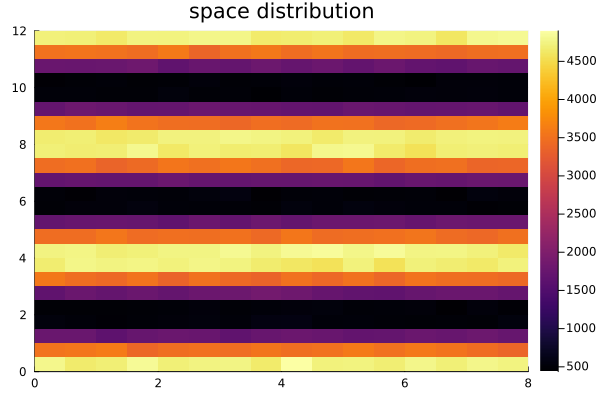

In [68]:
plot(histogram2d(par_dis[1:4:end],par_dis[2:4:end], title="space distribution" ))

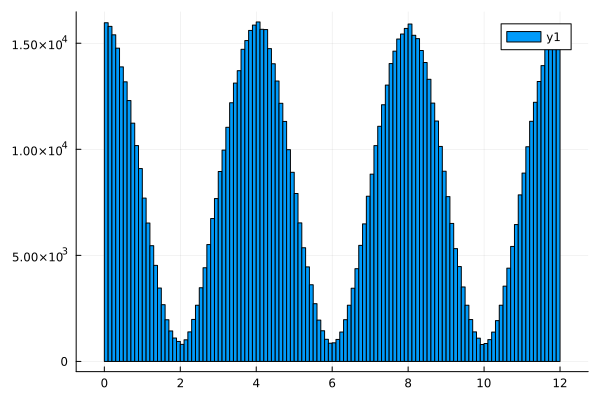

In [72]:
histogram(par_dis[2:2D:end])

In [69]:
Plots.scatter(par_dis[3:4:end],par_dis[4:4:end], ts=0.1
, thickness_scaling = 0.3
, markersize = 0.3
, title = "momentum", legend =:false
)
png(run_name * "_initial-momentum-distribution")

"test_6_1_initial-momentum-distribution.png"

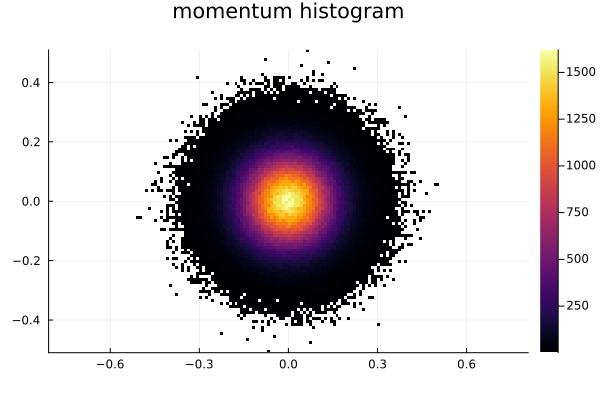

In [67]:
plot(histogram2d(par_dis[3:4:end],par_dis[4:4:end] )
,aspectratio=1
,title = "momentum histogram"
)

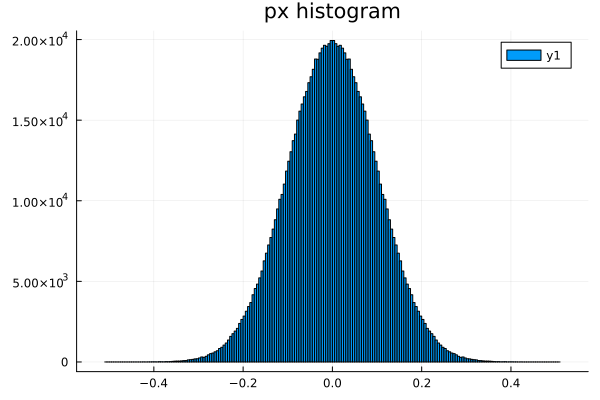

In [65]:
histogram(par_dis[D+1:2D:end], title="p_x histogram")

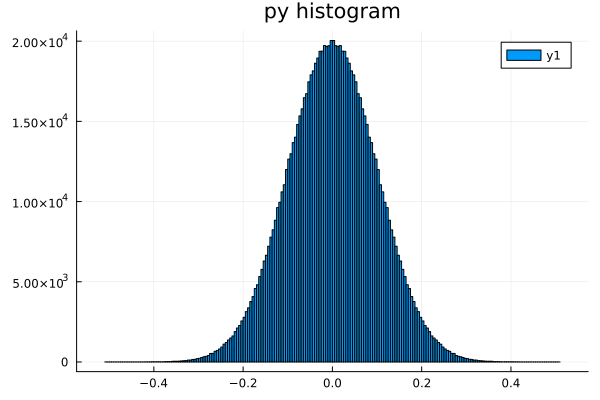

In [66]:
histogram(par_dis[D+2:2D:end], title="p_y histogram")

### Test Coordinate_test

In [75]:
Coordinate_test(par_dis,Box_x)

### Test distribution functions

1. Weibel

In [37]:
D = 2
Ax = 25
exp_Theta = 3
@show θ1 = 10.0^(-exp_Theta)
@show θ2 = Ax*θ1
    #p_max = sqrt((1+10*θ2)^2-1) # we put the largest here
@show p_max = 10θ2
Box_p = (-p_max,p_max,-p_max,p_max)
f_p = f_p_weibel
f_p_max = f_p_weibel_max
par_f_p_1 = (θ1,θ2,[0.5,0.0], 1, D)
#@show norm = int_mid_point_f(f_p, par_f_p_1, [20_000,20_000], Box_p)
#par_f_p = (θ1,θ2,[0.5,0.0], norm, D)
par_f_p_2 = (θ1,θ2,[-0.5,0.0], 1, D)


θ1 = 10.0 ^ -exp_Theta = 0.001
θ2 = Ax * θ1 = 0.025
p_max = 10θ2 = 0.25


(0.001, 0.025, [-0.5, 0.0], 1, 2)

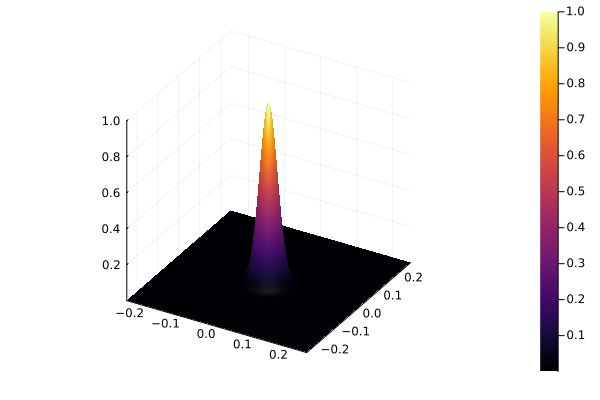

In [38]:
M = 101
dp = 2p_max/(M-1)
px = Array{Float64,1}(undef,M)
py = Array{Float64,1}(undef,M)
F = Array{Float64,2}(undef,(M,M))
for i in 1:M
    px[i] = -p_max + (i-1)*dp
    for j in 1:M
        py[j] = -p_max + (j-1)*dp
        F[i,j] = f_p([px[i],py[j]],par_f_p_1)*f_p([px[i],py[j]],par_f_p_2)
    end
end

surface(py,px,F)

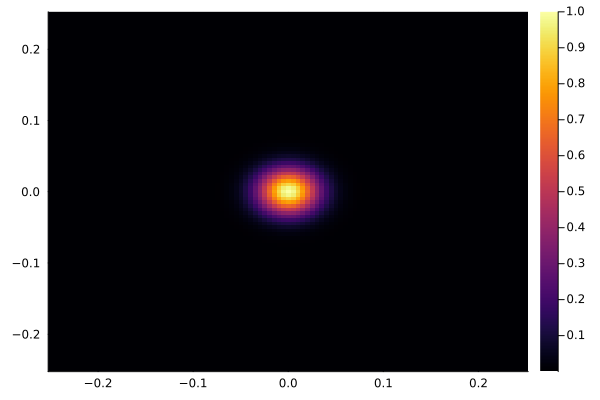

In [39]:
heatmap(px,py,F)